# Introduction
Pour ce Tp, on va utiliser le dataset du Titanic et a l'aide d'un réseau de neurone multicouche (mlpclassifier) on va créer un model pour prédire si un individu a survécu ou pas selon différent attribut (age , pclass,...).

In [176]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mlt
import seaborn as sns

# explorer le dataset:
avoir une idée de ce à quoi ressemble notre data set 'train.csv'

In [72]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Attributs numériques : 
- Age:Age en années(Continu).
- Fare: Tarif passager(Continu).
- SibSp: des frères et sœurs / conjoints à bord du Titanic (Discret) 
- Parch: des parents/enfants à bord du Titanic (Discret).

#### Attributs catégorique:
- Embarked: Port d'Embarquation (C = Cherbourg, Q = Queenstown, S = Southampton). 
- Pclass: Classe de billet(1 = 1er Classe, 2 = 2ème Classe, 3 = 3ème Classe).
- Survived: Survie (0 = Non, 1 = Oui). 
- Sex: genre(homme,femme).

#### Attributs alphanumériques :
- Ticket: Numéro de billet.
- Cabin: Numéro de cabine.


# Analyse de donnees:

In [73]:
# regardez un résumé de l'ensemble de données 
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [74]:
#les nombres des valeur manquant sur chaque attribut:
print(pd.isnull(df).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Resumé:
- Le nombre total de passagers dans notre dataset est de 891 passager.
- Il manque 177 valeurs à l'attribut Age, soit environ 19,8 % de ses valeurs.  
  Il s'agit d'un attribut important pour  la survie,  
  donc l'imputation de ces valeurs peut être une bonne idée.
- Il manque 687 valeurs à l'attribut Cabine, soit environ 77,1 % de ses valeurs.  
  Bien qu'il s'agisse d'un attribut important, avec autant de valeurs manquantes,  
  il sera difficile de remplacer la valeur manquante et, par conséquent,  
  ces valeurs seront supprimées de l'ensemble de données.
- Il manque 2 valeurs à l'attribut Embarqué,donc on peut les ignorer.

# Visualisation:

Pourcentage de femmes qui ont survécu: 74.20382165605095 %
Pourcentage d'hommes qui ont survécu: 18.890814558058924 %


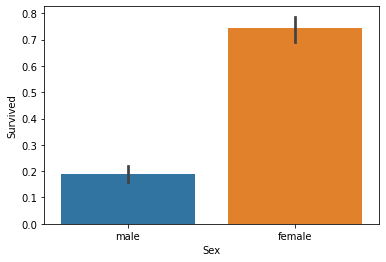

In [75]:
# diagramme des survivent parraport a leur genre:
sns.barplot(x="Sex", y="Survived", data=df)

#Pourcentage de femmes vs hommes qui ont survécu
print("Pourcentage de femmes qui ont survécu:", df["Survived"][df["Sex"] == 'female']
      .value_counts(normalize = True)[1]*100,"%")

print("Pourcentage d'hommes qui ont survécu:", df["Survived"][df["Sex"] == 'male']
      .value_counts(normalize = True)[1]*100,"%")

- Les femmes sont plus susceptibles de survivre que les hommes,  
  par conséquent l'attribut Sexe est important dans nos prédictions.

Pourcentage de détenteurs de billets de 1er Classe qui ont survécu : 62.96296296296296 %
Pourcentage de détenteurs de billets de 2ème Classe qui ont survécu : 47.28260869565217 %
Pourcentage de détenteurs de billets de 3ème Classe qui ont survécu : 24.236252545824847 %


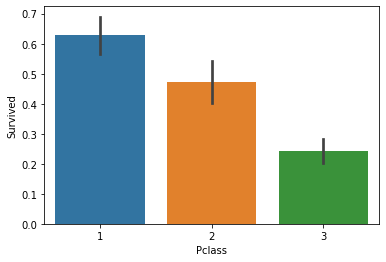

In [76]:
# diagrame de la survie par Pclass
sns.barplot(x="Pclass", y="Survived", data=df)

#le pourcentage de personnes par Pclass qui ont survécu
print("Pourcentage de détenteurs de billets de 1er Classe qui ont survécu :", 
      df["Survived"][df["Pclass"] == 1].
      value_counts(normalize = True)[1]*100,'%')

print("Pourcentage de détenteurs de billets de 2ème Classe qui ont survécu :", 
      df["Survived"][df["Pclass"] == 2].
      value_counts(normalize = True)[1]*100,'%')

print("Pourcentage de détenteurs de billets de 3ème Classe qui ont survécu :", 
      df["Survived"][df["Pclass"] == 3].
      value_counts(normalize = True)[1]*100,'%')

- les détenteurs de billets de 1er Classe ont plus de chances  
  de survivre avec un pourcentage de (62,9%)

# Nettoyage des données:

In [77]:
df = df.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1)

- on a enlever les donnees precedent de la dataset car:
    - Cabin : beacoup de valeur manquante
    - Name,Ticket,PassengerId,Cabin: des donnés non influent sur le target survie
  

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [79]:
df.describe(include = "all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### Embarked

In [80]:
#Remplir les valeurs manquantes dans l'attribut Embarqué
print("Nombre de personnes embarquant à Southampton (S) :")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Nombre de personnes embarquant à Cherbourg (C) :")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Nombre de personnes embarquant à Queenstown (Q) :")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)



Nombre de personnes embarquant à Southampton (S) :
644
Nombre de personnes embarquant à Cherbourg (C) :
168
Nombre de personnes embarquant à Queenstown (Q) :
77


- comme la plus part des passager on ambarquer depuit southampton  
    donc on va dire que les deux manquant sont monter aussi de southampton

In [81]:
#remplacer les valeurs en numerique
df['Embarked'].replace(['S','C','Q'], [1,2,3], inplace=True)

# SEX

In [82]:
#remplacer les valeurs en numerique
df['Sex'].replace(['male','female'], [0,1], inplace=True)

### age
Les valeurs manquantes pour l'attribut Age:  
Puisqu'un pourcentage élevé de valeurs manque,  
il ne serait pas logique de les remplir toutes avec la même valeur (comme nous l'avons fait avec Embarked).  
Au  lieu de cela on va eliminer les 177 lignes avec des valeurs null.

In [83]:
print(pd.isnull(df).sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [84]:
df = df.dropna(axis= 0)

In [85]:
df.shape

(712, 8)

# MLPClassifier

In [179]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

y= df['Survived']
X= df.drop('Survived',axis=1)


# diviser le dataset en donnees(entrenement et teste)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.9, random_state =1200)




In [192]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


parameters = {
    'solver': ['lbfgs','sgd'],
    'activation':['identity','logistic','tanh','relu'],
    }

mlp = MLPClassifier(hidden_layer_sizes=(500,200,400)) 

clf = GridSearchCV(mlp, parameters,n_jobs=-1)
clf.fit(X_train, y_train)




GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(500, 200, 400)),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd']})

In [193]:
clf.best_score_

0.790625

In [194]:
clf.best_params_

{'activation': 'identity', 'solver': 'lbfgs'}

In [195]:
clf1 = clf.best_estimator_
clf1.score(X_test, y_test)

0.8611111111111112

In [199]:
scaler = MinMaxScaler()
X_tr1= scaler.fit_transform(X)

# diviser le dataset en donnees(entrenement et teste)
X_train, X_test, y_train, y_test = train_test_split(X_tr1, y,train_size = 0.9, random_state =1200)



mlp1 = MLPClassifier(hidden_layer_sizes=(500,200,400), activation = 'tanh', solver ='lbfgs',random_state=100
                                    ).fit(X_train, y_train)

mlp1.score(X_test, y_test)

C:\Users\Etudiant\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8472222222222222

In [200]:
scaler = StandardScaler()
X_tr= scaler.fit_transform(X)

# diviser le dataset en donnees(entrenement et teste)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y,train_size = 0.9, random_state =1200)

mlp2 = MLPClassifier(hidden_layer_sizes=(500,200,400), activation = 'tanh', solver ='lbfgs',random_state=100
                                    ).fit(X_train, y_train)

mlp2.score(X_test, y_test)


C:\Users\Etudiant\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.875

# Conclusion:
on constate que avec la standardisation des valeur avec un (StandardScaler) donne le meilleur resultat de avec un score de 87,5% sur les donne de test. 